<a href="https://colab.research.google.com/github/inthemingcha/everything_mchae/blob/main/project_1_%EA%B9%80%EB%AF%BC%EC%B1%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section01_solo project**  김민채

## **Abstract**  
우리는 영화를 선택할 때 신뢰도가 높아보이는 영화 리뷰를 참고하곤 한다.  
평균 약 2시간 가량을 참고 인내할만한 흥미로운 영화를 보고 싶기 때문이다.  
**관객수가 곧 흥행**과 직결되는 상황에서 **흥행에 성공한 영화는 잘 만든 영화라는 인상**이 크다.   
이왕이면 **'잘 만든 영화를 보고 싶은 사람들은'** 영화 리뷰 사이트를 신경쓰지 않을 수 없다. 
### **그런데 정말, 영화 리뷰 지수가 흥행과 관련성이 높을까?**      


- 분석 기대: 영화흥행은 공신력 있는 영화 리뷰 사이트의 지수에 영향을 받는다.  
어떤 영화 리뷰 지수가 가장 흥행력이 높을까?
- 2002년부터 2016년, 총 15년 간 Rotten Tomatoes, IMDb, Metacritic의 평가를 분석한다.
- 영화는 각 년도마다 stratified sampling 기법으로 15편씩 총 225개다.
- 영화 리뷰 지수별 BoxOffice(흥행성적)와의 관련성을 분석한다.(흥행과 영화 리뷰 지수의 상관관계)  



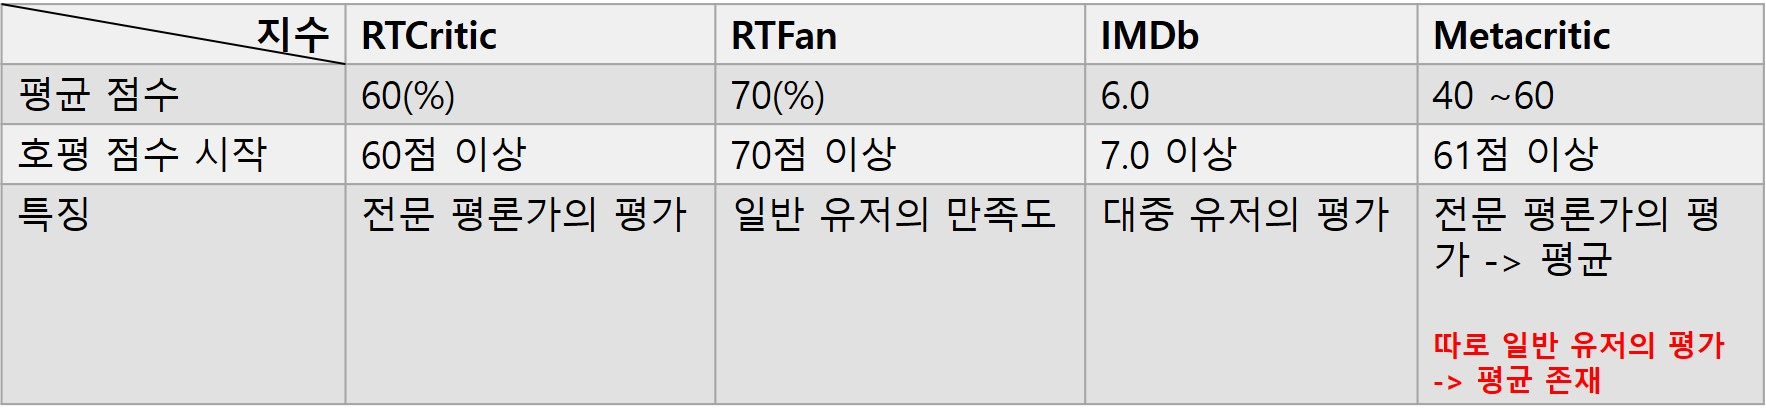

## <Feature 설명>     
- RT란 Rotten Tomatoes를 의미한다.  
(**RTCritic**은 RT의 Tomatometer 지표로서 **전문 평론가의 평가**를 나타낸다. **60이면 평균**이고 클수록 호평 받은 퍼센트지가 많다는 걸 뜻한다.   
한편, **RTFan**은 RT의 Popcorn bucket 지표로서 **일반 유저의 만족도**를 나타낸다.  
5점 만점에 3.5인 **70%가 평균**이고 **70% 이상의 평가**를 받을 경우 **일반 유저들로부터 호평**을 받은 것으로 해석한다.)  
- IMDb란 Internet Movie Database의 유저 평가이다.  
(IMDb는 전세계 1위 트래픽 유저 수를 지니고 있으므로 다른 영화 리뷰 지수에 비해 **대중적인 평가로 볼 수 있다는 시선이 있다.**      
 **6.0은 괜찮게 볼 수 있는 영화** 정도로 해석되고, **8.0은 대중성을 겸비한 명작**을 의미한다.   
 5.0은 즐기기에 좋은 killing time용 popcorn movie로 해석하고, 그 미만은 좋지 않다고 본다.)  
- **Metacritic**은 Metacritic의 Metascore를 의미하고, **전문 평론가의 평가**를 **평균** 내 지표로 활용한다.  
(주로 신문, 잡지와 같은 매체의 평론이 주를 이뤄 신뢰성은 높으나 동일한 이유로 RT에 비해 평가 수 자체는 적은 편이다.  
  **61부터 호평을 받은 영화** 로 해석되며, 40에서 60사이는 평균적이나 다소 평가자에 따라 엇갈리는 판단을 받았다고 해석하면 된다.)  
- BoxOffice column은 domestic revenue를 의미한다.  
(domestic이란 the United States and Canada다. 고로 revenue는 $)  
- Rating은 영화 관람 등급이다.  
(G > PG> PG-13 > R > NG 순으로 관람 허용 범위가 크다.)

In [1]:
# load dataset from local
# dataset_url = 'https://www.kaggle.com/antallen/comparing-numerical-movie-review-scores?select=MoviesData.csv'
# dataset name = 'MoviesData.csv'

from google.colab import files
uploaded = files.upload()  

Saving MoviesData.csv to MoviesData.csv


In [2]:
# load libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt


In [3]:
# load csv

df = pd.read_csv('MoviesData.csv')

print(df.shape)

df.head()

(225, 19)


,Titles,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice,Year,Action,Animation,Family,Scifi,Comedy,Drama,International,Romance,Horror,Mystery,Documentary
0,Treasure Planet,PG,69,70,7.1,60,38120554,2002,1,1,1,1,0,0,0,0,0,0,0
1,About Schmidt,R,85,74,7.2,85,65005217,2002,0,0,0,0,1,1,0,0,0,0,0
2,Secretary,R,76,82,7.0,63,4046737,2002,0,0,0,0,1,1,1,1,0,0,0
3,Irreversible,NR,57,80,7.4,51,792200,2002,0,0,0,0,0,1,1,0,0,0,0
4,Big Trouble,PG13,48,54,6.5,47,7262288,2002,0,0,0,0,1,1,0,0,0,0,0


In [4]:
# .isnull().sum()

df.isnull().sum()

Titles           0
Rating           0
RTCritic         0
RTFan            0
IMDb             0
Metacritic       0
BoxOffice        0
Year             0
Action           0
Animation        0
Family           0
Scifi            0
Comedy           0
Drama            0
International    0
Romance          0
Horror           0
Mystery          0
Documentary      0
dtype: int64

In [5]:
# check dtypes

df.dtypes

Titles            object
Rating            object
RTCritic           int64
RTFan              int64
IMDb             float64
Metacritic         int64
BoxOffice          int64
Year               int64
Action             int64
Animation          int64
Family             int64
Scifi              int64
Comedy             int64
Drama              int64
International      int64
Romance            int64
Horror             int64
Mystery            int64
Documentary        int64
dtype: object

In [6]:
# .describe()

df.describe()

,RTCritic,RTFan,IMDb,Metacritic,BoxOffice,Year,Action,Animation,Family,Scifi,Comedy,Drama,International,Romance,Horror,Mystery,Documentary
count,225.000000,225.000000,225.000000,225.000000,2.250000e+02,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,51.475556,59.146667,6.410222,52.800000,6.478499e+07,2009.000000,0.377778,0.048889,0.093333,0.200000,0.377778,0.466667,0.022222,0.097778,0.080000,0.231111,0.017778
std,26.562436,18.471039,0.991946,16.807205,7.802089e+07,4.330127,0.485913,0.216117,0.291548,0.400892,0.485913,0.500000,0.147734,0.297676,0.271898,0.422483,0.132437
min,1.000000,18.000000,2.300000,13.000000,1.747200e+04,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,44.000000,5.900000,40.000000,1.624716e+07,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,60.000000,6.500000,53.000000,3.788036e+07,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,75.000000,7.100000,64.000000,7.305868e+07,2013.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,92.000000,8.300000,90.000000,4.233158e+08,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **EDA**  
  
  Q. 어떤 영화 리뷰 지수가 실제 흥행과 상관성이 높을까?   
  1) RT(Rotten Tomatoes)Critic/ RTFan ----- BoxOffice  
  2) IMDb ----- BoxOffice  
  3) Metacritic ----- BoxOffice  



상관관계를 살피기 전, 각 영화 리뷰 지수별 histogram을 확인해보았다. (평균적인 상황 파악용)

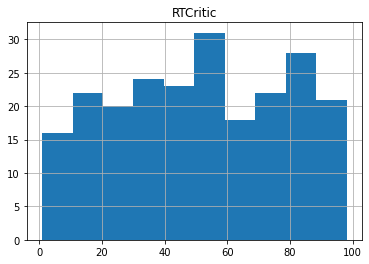

In [7]:
# eda visualization
# histogram

df.hist('RTCritic');

# RTCritic은 50에서 60점 사이가 가장 많아 보인다.(생각보다 평균인 60점대는 별로 없음)
# 대체적으로 여러 점수대가 극단적으로 편중되어 있진 않다.
# Rotten Tomatoes의 전문 평론가들이다보니, 호평하지 않는 것에 주저하지 않나 보다. 

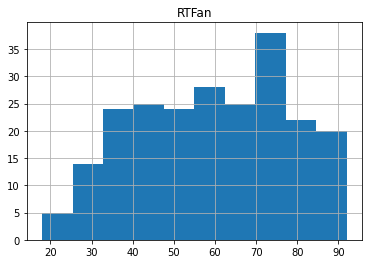

In [8]:
df.hist('RTFan');

# RTFan은 일반 유저의 만족도인데 생각보다 평균인 70점대가 많다.
# 의외로 낮은 점수대는 극히 적은 편
# 웬만하면 점수대가 RTCritic보다는 높게 주는 듯하다.

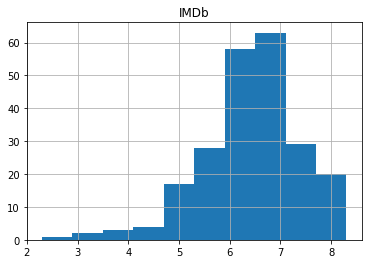

In [9]:
df.hist('IMDb');

# IMDb는 다른 영화 리뷰 지수보다 6.0에서 7.0에 높은 밀도를 보이고 있다.
# 평가하는 영화가 평균이거나 평균 이상인 경우가 많나 보다.
# 혹은 평가하는 영화에 이왕이면(?) 6점 이상을 주는 경우가 만연할 수도 있다.(팬이랄지)

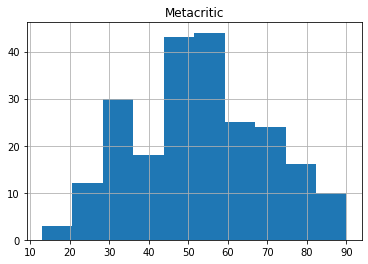

In [10]:
df.hist('Metacritic');

# Metacritic은 매체의 전문 평론가의 평가를 평균내 지수화 한다.
# 그러다보니 생각보다 40점대부터 50대 사이가 가장 많다.
# 그러나 *주의* 평균이 40이나 50이라고 해서 정말 별로였다는 것이 아니다.
# 극단적으로 평론가들 사이에서 호와 불호가 나뉘었다는 의미
# 평균 점수라서 가장 낮거나 높은 점수는 많지 않다.

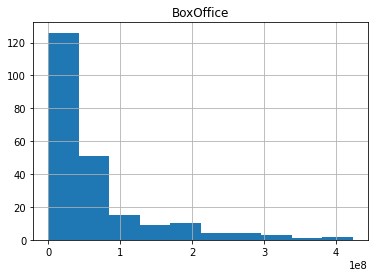

In [11]:
df.hist('BoxOffice');

# le8은 10의 8승의 의미다. 고로 x축의 각 지점은 억으로 계산한다.
# 흥행성적이 3억에서 4억인 경우는 많지 않고, 주로 1억원 사이에 밀집되어 있다.
# 전세계 흥행성적이 아니라 '북미권'의 domestic revenue 이기 때문이다.

### 잘못된 시각화는 아래와 같다.

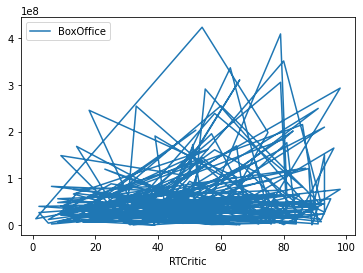

In [12]:
# eda visualization
# line plot

df.plot('RTCritic', 'BoxOffice');

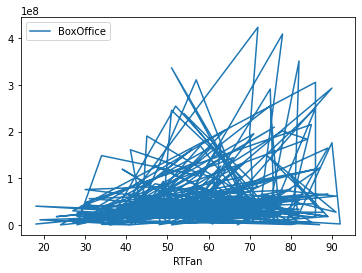

In [13]:
df.plot('RTFan', 'BoxOffice');

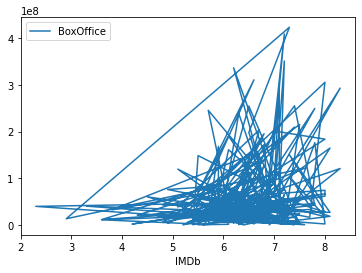

In [14]:
df.plot('IMDb', 'BoxOffice');

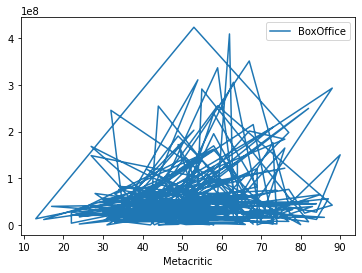

In [15]:
df.plot('Metacritic', 'BoxOffice');

line plot은 상관관계를 살피는데 좋은 시각화가 아니었다.  
보다 상관관계에 집중해 알아보고자 scatter plot을 진행하였다.

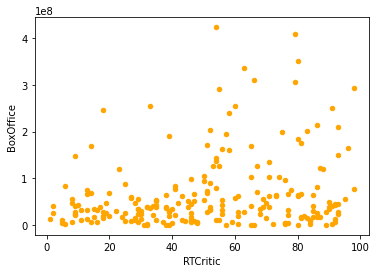

In [16]:
df.plot.scatter('RTCritic', 'BoxOffice', c= 'orange');

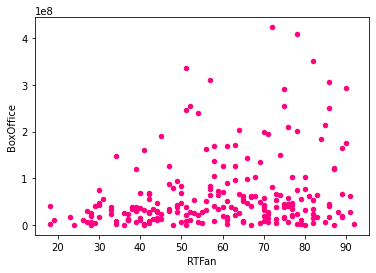

In [17]:
df.plot.scatter('RTFan', 'BoxOffice', c= '#ff007f');

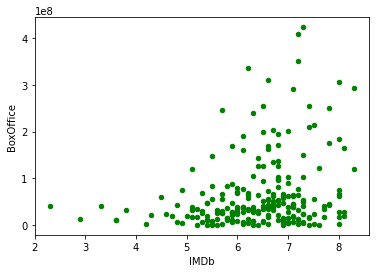

In [18]:
df.plot.scatter('IMDb', 'BoxOffice', c= 'green');

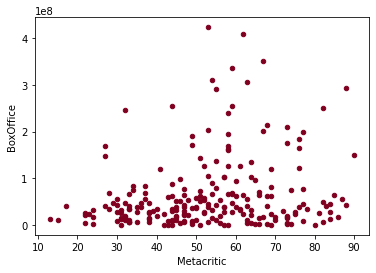

In [19]:
df.plot.scatter('Metacritic', 'BoxOffice', c= '#800020');

정말 믿고 싶지 않지만, 영화 리뷰 지수와 영화 흥행은 상관관계가 크게 있다고 보기 어려웠다.

   RTCritic  RTFan  IMDb  Metacritic
0        69     70   7.1          60
1        85     74   7.2          85
2        76     82   7.0          63
3        57     80   7.4          51
4        48     54   6.5          47


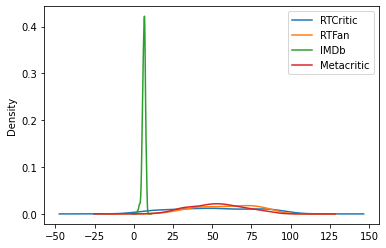

In [20]:
# eda visualization
# density plot

evaluations = df[['RTCritic', 'RTFan', 'IMDb', 'Metacritic']]

print(evaluations.head())

evaluations.plot.density();

# 다른 영화 리뷰 지수는 평가 점수 스펙트럼이 크기 때문에 평균도 높고 다양하게 평가되어 있어 정규 분포 모양 역시 넓게 퍼져있다.
# 그러나 IMDb는 대체적으로 작은 점수(0에서 10점 범위) 스펙트럼 안에서 5에서 7점 사이에 밀집되어 있다보니 뾰족한 모양의 정규 분포를 띈다.

## **EDA 후 Chi squared test 진행**  

**Chi-squared test 1)**  
Ho(귀무가설) = **RTCritic**는 BoxOffice에 영향을 주지 않는다.  
Ha(대안가설) = RTCritic는 BoxOffice에 영향을 준다.  

**Chi-squared test 2)**  
Ho(귀무가설) = **RTFan**은 BoxOffice에 영향을 주지 않는다.  
Ha(대안가설) = RTFan은 BoxOffice에 영향을 준다.  

**Chi-squared test 3)**  
Ho(귀무가설) = **IMDb**는 BoxOffice에 영향을 주지 않는다.  
Ha(대안가설) = IMDb는 BoxOffice에 영향을 준다.  

**Chi-squared test 4)**  
Ho(귀무가설) = **Metacritic**은 BoxOffice에 영향을 주지 않는다.  
Ha(대안가설) = Metacritic은 BoxOffice에 영향을 준다.

## **Chi-squared test 1)**

In [21]:
# Chi-squared test 1)

# Ho = RTCritic는 BoxOffice에 영향을 주지 않는다.
# pd.crosstab()

test_1 = pd.crosstab(df['RTCritic'], df['BoxOffice']).astype('category')

#test_1

In [22]:
# scipy -> Chi2test

from scipy.stats import chi2_contingency

chi2_contingency(test_1)


# p_value(유의확률) = 0.33056589415367466 > alpha(유의수준) = 0.05
# Ho(귀무가설) = RTCritic는 BoxOffice에 영향을 주지 않는다. -> 기각하지 않는다.
# RTCritic은 BoxOffice에 영향을 주지 않는다.

(19125.000000001215,
 0.3305658941514249,
 19040,
 array([[0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        ...,
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889]]))

## **Chi-squared test 2)**

In [25]:
# Chi-squared test 2)

# Ho(귀무가설) = RTFan은 BoxOffice에 영향을 주지 않는다.
# pd.crosstab()

test_2 = pd.crosstab(df['RTFan'], df['BoxOffice']).astype('category')

#test_2

In [26]:
# scipy -> Chi2test

chi2_contingency(test_2)


# p_value(유의확률) = 0.34827043916520334 > alpha(유의수준) = 0.05 
# Ho(귀무가설) = RTFan은 BoxOffice에 영향을 주지 않는다. -> 기각하지 않는다.
# RTFan은 BoxOffice에 영향을 주지 않는다.

(15075.000000001226,
 0.34827043916259864,
 15008,
 array([[0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        ...,
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444]]))

## **Chi-squared test 3)**

In [27]:
# Chi-squared test 3)  

# Ho(귀무가설) = IMDb는 BoxOffice에 영향을 주지 않는다.
# pd.crosstab()

test_3 = pd.crosstab(df['IMDb'], df['BoxOffice']).astype('category')

#test_3

In [28]:
# scipy -> chi2_contingency

chi2_contingency(test_3)


# p_value(유의확률) = 0.3767029834006296 > alpha(유의수준) = 0.05 
# Ho(귀무가설) = IMDb는 BoxOffice에 영향을 주지 않는다. -> 기각하지 않는다.
# IMDb는 BoxOffice에 영향을 주지 않는다.

(9675.000000000486,
 0.37670298339930475,
 9632,
 array([[0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        ...,
        [0.03555556, 0.03555556, 0.03555556, ..., 0.03555556, 0.03555556,
         0.03555556],
        [0.01333333, 0.01333333, 0.01333333, ..., 0.01333333, 0.01333333,
         0.01333333],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889]]))

## **Chi-squared test 4)**

In [29]:
# Chi-squared test 4)  

# Ho(귀무가설) = Metacritic은 BoxOffice에 영향을 주지 않는다.
# pd.crosstab()

test_4 = pd.crosstab(df['Metacritic'], df['BoxOffice']).astype('category')

#test_4

In [30]:
# scipy -> chi2_contingency

chi2_contingency(test_4)


# p_value(유의확률) = 0.3493297470214296 > alpha(유의수준) = 0.05 
# Ho(귀무가설) = Metacritic은 BoxOffice에 영향을 주지 않는다. -> 기각하지 않는다.
# Metacritic은 BoxOffice에 영향을 주지 않는다.

(14850.000000001539,
 0.3493297470181269,
 14784,
 array([[0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        ...,
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444],
        [0.00888889, 0.00888889, 0.00888889, ..., 0.00888889, 0.00888889,
         0.00888889],
        [0.00444444, 0.00444444, 0.00444444, ..., 0.00444444, 0.00444444,
         0.00444444]]))

## **Chi2_contingency Results**  

사람들이 일반적으로 생각하는 것과 달리 영화 리뷰 사이트의 지수는 흥행과 큰 상관관계가 있지 않았다. (충격)  
scatter plot의 내용을 재확인하는 결과

## **Correlation coefficient(상관계수)로 2차 검정** 

In [31]:
# .corr() 
# -1< correlation coefficient < 1
# ~0 = 상관관계가 없다.

RTCritic = df[['RTCritic', 'BoxOffice']]

RTCritic.corr()

,RTCritic,BoxOffice
RTCritic,1.000000,0.216312
BoxOffice,0.216312,1.000000


In [32]:
RTFan = df[['RTFan', 'BoxOffice']]

RTFan.corr()

,RTFan,BoxOffice
RTFan,1.000000,0.251602
BoxOffice,0.251602,1.000000


In [33]:
IMDb = df[['IMDb', 'BoxOffice']]

IMDb.corr()

,IMDb,BoxOffice
IMDb,1.00000,0.25458
BoxOffice,0.25458,1.00000


In [34]:
Metacritic = df[['Metacritic', 'BoxOffice']]

Metacritic.corr()

,Metacritic,BoxOffice
Metacritic,1.000000,0.197122
BoxOffice,0.197122,1.000000


## **Correlation Coefficient Result**

가설검정과 마찬가지로, 영화 리뷰 지수와 흥행은 관련성이 없다.  

eda - chi2_contingency - correlation coefficient 모두 같은 이야기를 하고 있었다.

## **Why - 이유 설명하기** 

dataset에서 흥행 성적이 좋은 영화와 나쁜 영화를 가지고, 각 영화 리뷰 지수를 직접 확인시켜준다.  



In [35]:
df

,Titles,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice,Year,Action,Animation,Family,Scifi,Comedy,Drama,International,Romance,Horror,Mystery,Documentary
0,Treasure Planet,PG,69,70,7.1,60,38120554,2002,1,1,1,1,0,0,0,0,0,0,0
1,About Schmidt,R,85,74,7.2,85,65005217,2002,0,0,0,0,1,1,0,0,0,0,0
2,Secretary,R,76,82,7.0,63,4046737,2002,0,0,0,0,1,1,1,1,0,0,0
3,Irreversible,NR,57,80,7.4,51,792200,2002,0,0,0,0,0,1,1,0,0,0,0
4,Big Trouble,PG13,48,54,6.5,47,7262288,2002,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,13 Hours: The Secret Soldiers of Benghazi,R,50,82,7.3,48,52853219,2016,1,0,0,0,0,1,0,0,0,0,0
221,Race,PG13,61,77,7.1,56,19115191,2016,0,0,0,0,0,1,0,0,0,0,0
222,God's Not Dead 2,PG,9,63,4.3,22,20773069,2016,0,0,0,0,0,1,0,0,0,0,0
223,The Purge: Election Year,R,54,48,6.0,55,79042440,2016,1,0,0,0,0,0,0,0,1,1,0


In [36]:
check_it_out = df[['Titles',	'Rating',	'RTCritic',	'RTFan',	'IMDb',	'Metacritic',	'BoxOffice']]
check_it_out

,Titles,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice
0,Treasure Planet,PG,69,70,7.1,60,38120554
1,About Schmidt,R,85,74,7.2,85,65005217
2,Secretary,R,76,82,7.0,63,4046737
3,Irreversible,NR,57,80,7.4,51,792200
4,Big Trouble,PG13,48,54,6.5,47,7262288
...,...,...,...,...,...,...,...
220,13 Hours: The Secret Soldiers of Benghazi,R,50,82,7.3,48,52853219
221,Race,PG13,61,77,7.1,56,19115191
222,God's Not Dead 2,PG,9,63,4.3,22,20773069
223,The Purge: Election Year,R,54,48,6.0,55,79042440


In [37]:
# BoxOffice(흥행수익)을 기준으로 재정렬

check_it_out.sort_values(by = ['BoxOffice'], ascending = False, axis =0)

,Titles,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice
74,Pirates of the Caribbean: Dead Man's Chest,PG13,54,72,7.3,53,423315812
170,Iron Man 3,PG13,79,78,7.2,62,408992272
209,Furious 7,PG13,80,82,7.2,67,351032910
89,Spider-Man 3,PG13,63,51,6.2,59,336530303
10,Star Wars: Episode II - Attack of the Clones,PG,66,57,6.6,54,310676740
...,...,...,...,...,...,...,...
65,Southland Tales,R,38,41,5.5,44,275380
106,World's Greatest Dad,R,89,67,6.9,69,221805
129,Freakonomics,PG13,66,51,6.4,58,101270
136,5 Days of War,R,32,36,5.6,31,17479


그러나 본 dataset의 영화들은 나에게 흥미롭지 못했다.  
따라서 dataset에서만 제한적으로 영화를 확인해 비교하는 것보다   
내가 흥미롭게 보았던 친숙한 영화를 무작위로 뽑아 dataset에서의 결론과 일치하는지 확인해보고,   
비교하는 것이 더 재밌는 storytelling이 될 것이라 판단해 진행했다. 

### RTCritic, RTFan, IMDb, Metacritic 모두 매우 높은나 BoxOffice는 처참한 경우 :
### <Incendies_그을린 사랑>

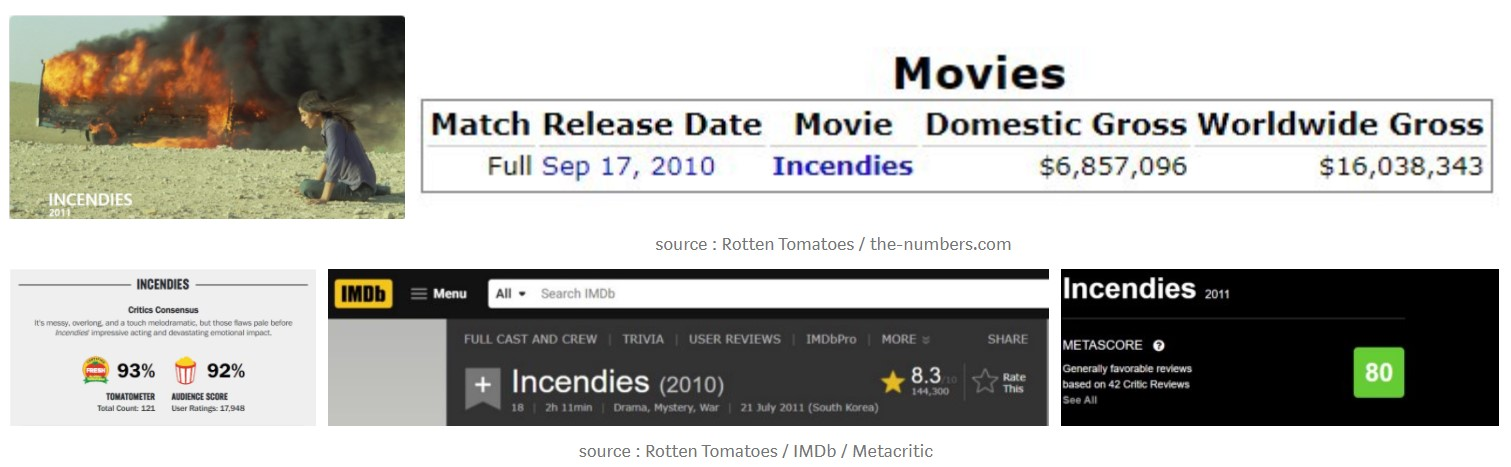

### RTCritic, RTFan, IMDb, Metacritic 모두 보통 /낮으나 BoxOffice는 흥행한 경우 :   
### <MR. & Mrs. Smith>

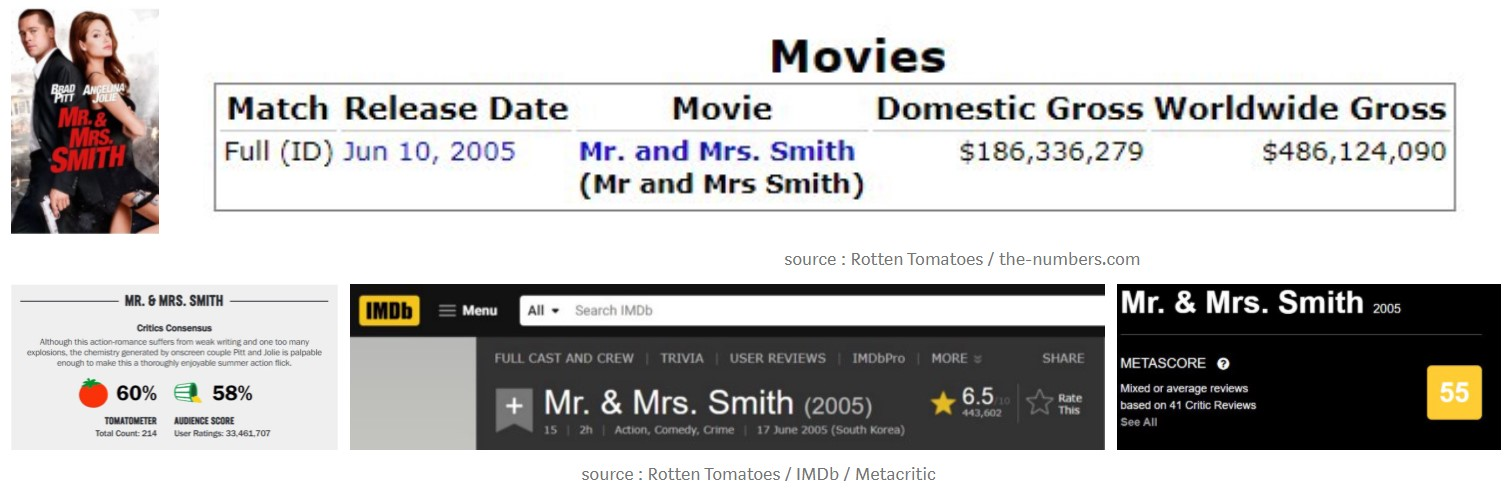

### **추가로, 영화 리뷰 지수별 특징을 가지고 지수와 흥행성적이 다른 이유를 설명해보기**
 (주로 추론이 될 것 같다.)  
 : blogging 참고 [minchae_kim의 medium](https://medium.com/@sutjr1013/5th-project-1-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EC%A7%80%EC%88%98%EC%99%80-%ED%9D%A5%ED%96%89%EC%9D%98-%EC%97%87%EB%B0%95%EC%9E%90-%EC%97%87%EB%B0%95%EC%9E%90-%EC%86%8D%EC%97%90%EC%84%9C-%EB%B0%9C%EA%B2%AC%EB%90%98%EB%8A%94-%EC%A0%95%EB%B0%95%EC%9E%90%EC%9D%98-%EC%88%9C%EA%B0%84%EB%93%A4-9406d8efb806)